# Sección para importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_model_dataset(location: str, group_by_field='epoch'):
    model_info = pd.read_csv(location)
    group_by_model = model_info.groupby(group_by_field)
    return group_by_model

# Resultados del entrenamiento para PhiLeNet Model
Después del entrenamiento de los modelos, las métricas fueron guardadas en archivos csv para su análisis. A continuación, se examinarán los datos guardados y se presentará una comparación entre los distintos modelos para ver su desempeño frente a otro modelo.

## Ejecución de experimentos con el modelo PhiLeNet
Como originalmente se plantea en E. López-Jiménez, et al., (2019), para se ejecutaron dos experimentos: un experimento con una transformación sin aumentos y un experimento con volteo horizontal o vertical.
### Resultado con transformación "no augmentation"
Para demostrar los resultados, primero se hará la carga de las metricas previamente generadas:

In [16]:
no_aug_training_model = load_model_dataset('../data/processed/phi_no_aug/train.csv')
no_aug_testing_model = load_model_dataset('../data/processed/phi_no_aug/test.csv')

Luego, para exponer la evolución de las metricas através del experiento se generan los siguientes gráficos:

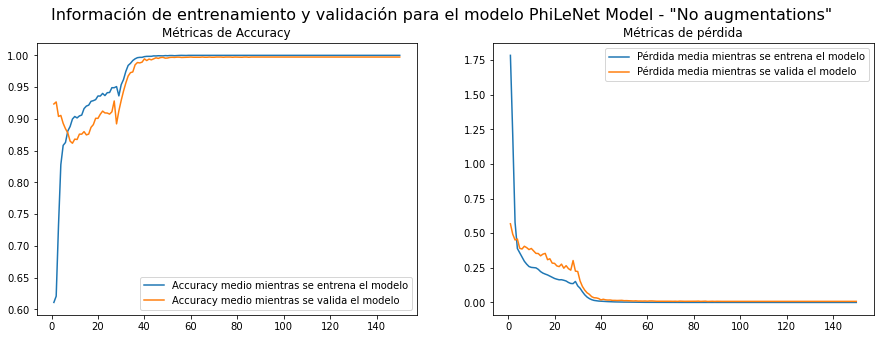

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Información de entrenamiento y validación para el modelo PhiLeNet Model - "No augmentations"', fontsize=16)
ax[0].set_title("Métricas de Accuracy")
ax[0].plot(no_aug_training_model.mean()['accuracy'], label='Accuracy medio mientras se entrena el modelo')
ax[0].plot(no_aug_testing_model.mean()['accuracy'], label='Accuracy medio mientras se valida el modelo')
ax[0].legend()
ax[1].set_title("Métricas de pérdida")
ax[1].plot(no_aug_training_model.mean()['loss'], label='Pérdida media mientras se entrena el modelo')
ax[1].plot(no_aug_testing_model.mean()['loss'], label='Pérdida media mientras se valida el modelo')
ax[1].legend()

En estos graficos por cada uno de los EPOCH, se calcula el accuracy y la pérdida media para ver cómo se comportó el modelo en nuestro ambiente. El modelo se comporta con problemas de reconocimiento durante los primeros 30 EPOCHs, sin embargo logra estabilizarse despues de esto y nos da los siguientes resultados:

In [6]:
no_aug_training_model.mean()['accuracy'].mean()

0.9772199283446711

In [7]:
no_aug_testing_model.mean()['accuracy'].mean()

0.9752883333333333

El accuracy, tanto para el entrenamiento como para la validación llega aun 97%, llegando a niveles parecidos a los descritos por E. López-Jiménez, et al., (2019).

### Resultados con transformación "flip"
Para los resultados, también cargaremos las métricas previamente generadas:

In [9]:
flip_training_model = load_model_dataset('../data/processed/phi_flip/train.csv')
flip_testing_model = load_model_dataset('../data/processed/phi_flip/test.csv')

Luego, para exponer la evolución de las metricas através del experiento se generan los siguientes gráficos:

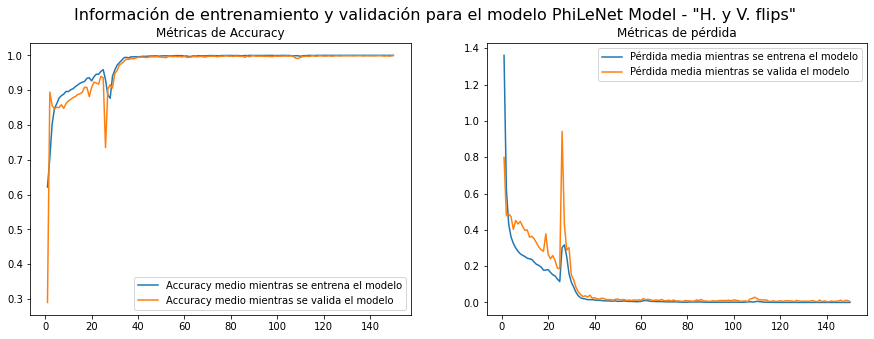

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Información de entrenamiento y validación para el modelo PhiLeNet Model - "H. y V. flips"', fontsize=16)
ax[0].set_title("Métricas de Accuracy")
ax[0].plot(flip_training_model.mean()['accuracy'], label='Accuracy medio mientras se entrena el modelo')
ax[0].plot(flip_testing_model.mean()['accuracy'], label='Accuracy medio mientras se valida el modelo')
ax[0].legend()
ax[1].set_title("Métricas de pérdida")
ax[1].plot(flip_training_model.mean()['loss'], label='Pérdida media mientras se entrena el modelo')
ax[1].plot(flip_testing_model.mean()['loss'], label='Pérdida media mientras se valida el modelo')
ax[1].legend()

Este modelo se comporta en una forma similar, sin embargo aproximadamente en el EPOCH 30, durante la validación el modelo tuvo problemas para reconocimiento, esto se puede dar por distintos motivos (desvanecimiento de la gradiente, el learning rate siendo muy alto). Pese a esto el modelo se logra estabilizar de la misma forma que el anterior y nos genera los siguientes resultados:

In [11]:
flip_training_model.mean()['accuracy'].mean()

0.977499268027211

In [12]:
flip_testing_model.mean()['accuracy'].mean()

0.9699671666666658

El *accuracy* generado es menor sin embargo se asemeja al resultado anterior y se mantiene en el margen de lo expuesto por E. López-Jiménez, et al., (2019) (entre 98 y 95%).

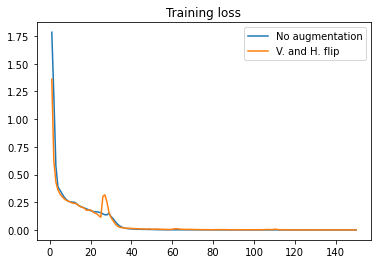

In [13]:
plt.title("Training loss")
plt.plot(no_aug_training_model.mean()['loss'], label='No augmentation')
plt.plot(flip_training_model.mean()['loss'], label='V. and H. flip')
plt.legend()

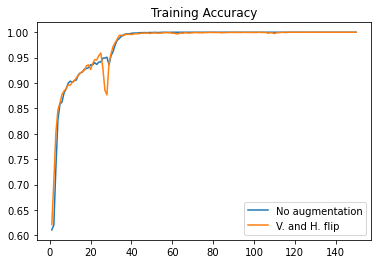

In [14]:
plt.title("Training Accuracy")
plt.plot(no_aug_training_model.mean()['accuracy'], label='No augmentation')
plt.plot(flip_training_model.mean()['accuracy'], label='V. and H. flip')
plt.legend()

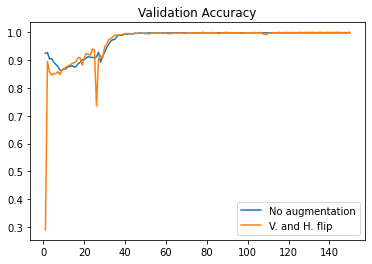

In [15]:
plt.title("Validation Accuracy")
plt.plot(no_aug_testing_model.mean()['accuracy'], label='No augmentation')
plt.plot(flip_testing_model.mean()['accuracy'], label='V. and H. flip')
plt.legend()

### Comparación con los resultados del experimento original
Los *accuracy*, de estos dos modelos entrenados con diferentes transformaciones, se generaron dentro del margen expuesto por E. López-Jiménez, et al., (2019), por lo que los experimentos están cumpliendo con la expectativa de rendimento esperado al inicio del proyecto. Sin embargo, durante la generación de los modelos se notaron elementos clave que modificaban esta medida de accuracy, dentro de los que se puede mencionar:
#### El orden de cómo se alimentaban las imágenes durante el entrenamiento de los modelos 
Para el entrenamiento de una red, se recomienda el barajar los datos antes de un entrenamiento de una red neural. Por motivos de reproducibilidad, se determinó el escoger un valor fijo de semilla para predeterminar el orden aleatorio en el que cada vez se iban a barajar las imágenes antes de que estas fueran alimentadas al modelo. Se intentó con varias semillas y los modelos creados tendían siempre a exponer diferentes comportamientos, desde ser demasiado similares hasta durante diferentes puntos exponer un desvanecimientos de gradiente. Pese a eso, los modelos siempre tendían a estabilizarse y a variar en sus métricas, algunos con mejor o peor *accuracy*, por lo que se escogió una semilla que generara métricas con el rendimiento esperado del proyecto y estabilizara el comportamiento del modelo. En este caso la semilla fue el número 42.
#### Falta de funciones de activación
A. Krizhevsky et al., define en su modelo varias aplicaciones de la función de activación ReLU esto para mejorar el aprendizaje y su velocidad. Sin embargo, en la especificación de E. López-Jiménez, et al., (2019) no se hace mención del uso de estas funciones. Al mejorar el aprendizaje, quedaría como un trabajo a futuro determinar si este modelo puede mejorar su desepeño con el uso de estas funciones.